### Setup Inicial

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.6.0'

In [3]:
# Limitar o tensorflow para usar a VRAM do GPU (Evitar erros OOM (Out Of Memory))
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) # Limitar o tensoflow para usar apenas a memória que realmente precisa

### Remover Possíveis Imagens Irreconhecíveis

In [27]:
extensoes = ['jpeg', 'png', 'jpg', 'bmp']

In [28]:
os.listdir('assets')

['aletria',
 'arroz_cabidela',
 'bacalhau_bras',
 'bacalhau_natas',
 'batatas_fritas',
 'bolinhos_bacalhau',
 'bolo_chocolate',
 'caldo_verde',
 'cozido_portuguesa',
 'esparguete_bolonhesa',
 'feijoada',
 'francesinha',
 'gelado',
 'hamburguer',
 'jardineira',
 'nata',
 'ovo',
 'pizza',
 'tripas_moda_porto']

In [29]:
teste = cv2.imread(os.path.join('assets', 'aletria', '9.jpg'))

In [30]:
teste.shape

(187, 270, 3)

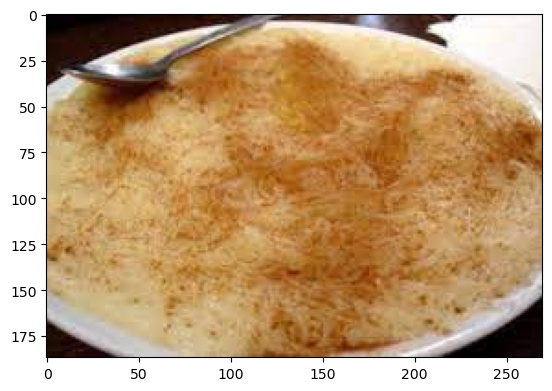

In [31]:
plt.imshow(cv2.cvtColor(teste, cv2.COLOR_BGR2RGB))

In [32]:
for class_imagem in os.listdir('assets'): 
    for imagem in os.listdir(os.path.join('assets', class_imagem)): # Para todas as pastas de imagens
        path_imagem = os.path.join('assets', class_imagem, imagem) # Cada imagem em cada pasta
        try:
            img = cv2.imread(path_imagem) # Abrir a imagem
            tip = imghdr.what(path_imagem)
            if tip not in extensoes:
                print('Extensão da imagem não compatível com a leitura Python, a remover a imagem {}'.format(path_imagem))
                os.remove(path_imagem)
        except Exception as e:
            print('Erro com a imagem {}'.format(path_imagem))

Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\aletria\201.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\aletria\71.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\aletria\90.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\aletria\97.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_bras\282.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_bras\484.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_natas\15.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_natas\77.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_natas\84.jpg
Extensão da imagem não compatível com a leitura Python, a remover a imagem assets\batatas_f

### Ler os Dados

In [4]:
# Criar dataset apartir da pasta das imagens
dados = tf.keras.utils.image_dataset_from_directory('assets')

Found 5173 files belonging to 19 classes.


In [5]:
# A variável "dados" não é concretamente no dataset gravado na memória, mas um gerador
# Vamos então criar os dados da maneira que procuramos, isto é útil para grandes quantidades de dados
dados_iterator = dados.as_numpy_iterator()

In [6]:
# Pegar num "batch" (pedaço) dos dados para evitar que o ambiente "morra"
batch = dados_iterator.next()

In [7]:
# Imagens representadas em arrays numpy
batch[0].shape

(32, 256, 256, 3)

In [8]:
batch[1]

array([15, 15, 15, 12, 13,  2,  6, 11, 11,  9, 11, 12,  9,  4, 13, 17, 12,
        2, 17, 16,  2,  0, 13, 11,  2, 16, 17,  9,  6,  9, 12, 11])

In [9]:
del dados
del dados_iterator

In [10]:
# Verificar a que comida está ligada cada classe
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

: 

: 